<a href="https://colab.research.google.com/github/RubyNixx/machine_learning/blob/main/7_Unsupervised_Learning_Model_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Tuning


Hyperparameter tuning is a critical step in optimizing machine learning models. It involves finding the combination of parameters that yields the best model performance. We'll explore three methods: Grid Search, Random Search, and Bayesian Optimisation, using scikit-learn and additional libraries for Bayesian Optimisation.

Before getting started, let's load a new dataset and explore it. It is the famous iris dataset, which is widely used in Machine Learning Tutorials

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import time

iris=load_iris()
iris_data=iris.data
iris_data=pd.DataFrame(iris_data, columns= iris.feature_names)
iris_data['class']=iris.target
iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


This data set consists of the physical parameters of three species of flower — Versicolor, Setosa and Virginica. The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length. In this data we will be predicting the classes of the flowers based on these parameters.The data consists of continuous numeric values which describe the dimensions of the respective features. We will be training the model based on these features

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Axes: >

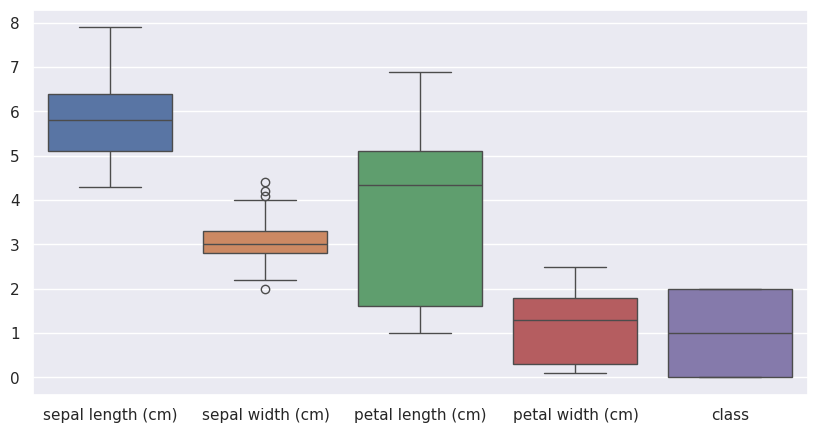

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data=iris_data)


## **1 Grid Search**

Grid Search exhaustively searches through a manually specified subset of the hyperparameter space of a learning algorithm.

In [ ]:
# Let's reload the dataset in aslightly different format

# X contains the input features, y the target variable (the species)
X, y = load_iris(return_X_y=True)

# Define model
model = RandomForestClassifier()

# Define parameters to search
param_grid = {
    'n_estimators': [10, 50, 100,150, 200],
    'max_depth': [None, 10, 20, 25, 30]
}

# Perform Grid Search
start_time = time.time()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)
grid_search_time = time.time() - start_time

print("Best parameters:", grid_search.best_params_)
print("Execution time:", grid_search_time)


Best parameters: {'max_depth': None, 'n_estimators': 100}
Execution time: 25.99455451965332


## **2 Random Search**
Random Search samples a given number of candidates from a parameter space with a specified distribution.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distribution
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None, 10, 20, 30]
}

# Perform Random Search
start_time = time.time()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5)
random_search.fit(X, y)
random_search_time = time.time() - start_time

print("Best parameters:", random_search.best_params_)
print("Execution time:", random_search_time)

Best parameters: {'max_depth': None, 'n_estimators': 31}
Execution time: 20.258251667022705


## **3 Bayesian Optimisation**

Bayesian Optimization uses a probabilistic model to predict the performance of a model with certain hyperparameters and chooses the next hyperparameters to evaluate by balancing exploration and exploitation.

In [ ]:
pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the model evaluation function
def rf_eval(n_estimators, max_depth):
    model = RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth) if max_depth else None)
    return np.mean(cross_val_score(model, X, y, cv=5))

# Define parameter bounds
pbounds = {
    'n_estimators': (10, 200),
    'max_depth': (5, 30)
}

# Perform Bayesian Optimization
optimizer = BayesianOptimization(f=rf_eval, pbounds=pbounds, random_state=1)
start_time = time.time()
optimizer.maximize(init_points=2, n_iter=10)
bayesian_opt_time = time.time() - start_time

print("Best parameters:", optimizer.max['params'])
print("Execution time:", bayesian_opt_time)


|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
| 1         | 0.9667    | 15.43     | 146.9     |
| 2         | 0.96      | 5.003     | 67.44     |
| 3         | 0.96      | 15.71     | 145.6     |
| 4         | 0.96      | 25.75     | 135.4     |
| 5         | 0.9667    | 8.733     | 129.5     |
| 6         | 0.96      | 7.152     | 154.2     |
| 7         | 0.9533    | 14.89     | 40.68     |
| 8         | 0.9533    | 27.19     | 94.97     |
| 9         | 0.96      | 15.81     | 76.88     |
| 10        | 0.96      | 20.25     | 84.65     |
| 11        | 0.9667    | 18.83     | 143.4     |
| 12        | 0.96      | 8.711     | 87.27     |
Best parameters: {'max_depth': 15.42555011756435, 'n_estimators': 146.86165375401004}
Execution time: 16.081096410751343


**Timing Difference**

Grid Search and Random Search vary significantly in execution time, primarily due to the exhaustive nature of Grid Search compared to the stochastic nature of Random Search. Bayesian Optimization, while potentially slower per iteration due to the need to update its model, often reaches optimal parameters faster than Grid Search.

**Conclusion**
- **Grid Search** is thorough but can be very time-consuming, especially with large hyperparameter spaces.
- **Random Search** offers a good balance between exploration and execution time, being more efficient than Grid Search.
- **Bayesian Optimisation** is efficient for finding the best hyperparameters by intelligently selecting the next hyperparameters to evaluate, potentially saving time and computational resources.

In [ ]:
#@title Click the play button to run the code and view the question.

import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the question and options
question = widgets.HTML(value="<b>Which parameter tuning method evaluates every possible combination of the provided hyperparameter values?</b>")
options = ['Random Search',
           'Bayesian Optimization',
           'Grid Search',
           'Sequential Model-Based Optimization']
correct_answer = 'Grid Search'

# Create RadioButtons for options with improved styling
radio_buttons = widgets.RadioButtons(
    options=options,
    description='Answers:',
    layout={'width': 'max-content'}  # This can help prevent text wrapping issues
)

# Create a button for submissions
submit_button = widgets.Button(
    description="Submit",
    button_style='success',  # Adds color to the button
    layout={'width': '300px'}  # Set the width of the button
)

# Create an output widget for displaying responses
output = widgets.Output()

# Define the event handler for the submission button
def on_submit(b):
    with output:
        clear_output()
        # Display the result with HTML styling for background color
        if radio_buttons.value == correct_answer:
            display(widgets.HTML(value=f"<div style='background-color: #4CAF50; color: white; padding: 10px;'>Correct! Well done.</div>"))
        else:
            display(widgets.HTML(value=f"<div style='background-color: #F44336; color: white; padding: 10px;'>Incorrect. The correct answer is: {correct_answer}</div>"))

# Link the button click event to the event handler
submit_button.on_click(on_submit)

# Display the widgets
display(question, radio_buttons, submit_button, output)


HTML(value='<b>Which parameter tuning method evaluates every possible combination of the provided hyperparamet…

RadioButtons(description='Answers:', layout=Layout(width='max-content'), options=('Random Search', 'Bayesian O…

Button(button_style='success', description='Submit', layout=Layout(width='300px'), style=ButtonStyle())

Output()